In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import clip
import meerkat as mk
import torch
from domino.clip import *

## Embed words

In [3]:
#words_dp = get_wiki_words(eng_only=True).load()
words_dp = get_wiki_words.out(run_id=4507).load()

task: get_wiki_words, run_id=4507


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [37]:
#words_dp = embed_words(words_dp).load()
words_dp = embed_words.out(4508).load()

## Embed Images

In [237]:
from domino.data.visual_genome import get_dps
image_dp, attr_dp, object_dp = get_dps()

In [290]:
dp = object_dp.lz[
    object_dp["syn_name"].isin(
        ["man.n.01", "person.n.01", "woman.n.01"]
        #["car.n.01"]
    )
]

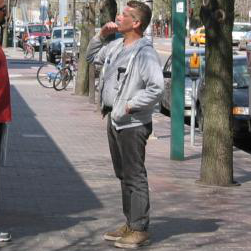

In [311]:
dp[1]["object_image"]

In [292]:
from domino.clip import embed_images

In [293]:
dp = embed_images(dp=dp, img_column="object_image")

In [332]:
dp["has_attribute"] = np.isin(
    dp["object_id"], 
    attr_dp.lz[attr_dp["attribute"] == ""]["object_id"]
).astype(int)

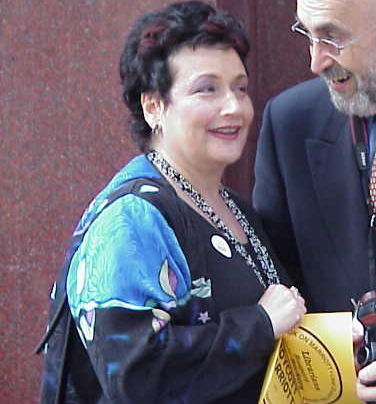

In [333]:
dp.lz[dp["has_attribute"] == 1][4]["object_image"]

In [334]:
attr_emb = dp.lz[dp["has_attribute"] == 1]["emb"].data.numpy().mean(axis=0)
ref_emb = dp["emb"].data.numpy().mean(axis=0)

scores = np.dot( 
    words_dp["emb"].data.numpy(),
   (attr_emb - ref_emb)
)
words_dp.lz[(-scores).argsort()[:20]]

,word (PandasSeriesColumn),frequency (PandasSeriesColumn),index (PandasSeriesColumn),tokens (LambdaColumn),emb (TensorColumn)
0,cheesiness,54,53009,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
1,delighted,6285,10158,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
2,cheerful,4088,12469,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
3,coquettishness,15,69718,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
4,dietitian,381,31026,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
5,gleefully,739,24904,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
6,gleeful,327,32525,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
7,simile,487,28661,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
8,punchable,11,74990,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
9,smiling,4389,12084,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))


In [300]:
words_dp.lz[(-scores).argsort()[:20]]

,word (PandasSeriesColumn),frequency (PandasSeriesColumn),index (PandasSeriesColumn),tokens (LambdaColumn),emb (TensorColumn)
0,volleying,180,38728,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
1,kicking,11906,7478,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
2,running,255120,929,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
3,athleticism,1249,20523,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
4,explosiveness,116,43707,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
5,throwing,26108,4862,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
6,sportily,4,87593,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
7,leaping,2600,15246,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
8,nutmegged,18,67817,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
9,scrimmage,3013,14300,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))


In [305]:
words_dp.lz[:int(1e4)]

,word (PandasSeriesColumn),frequency (PandasSeriesColumn),index (PandasSeriesColumn),tokens (LambdaColumn),emb (TensorColumn)
0,the,151983633,0,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
1,the,151983633,1,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
2,of,71874676,2,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
3,of,71874676,3,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
4,and,62210193,4,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
...,...,...,...,...,...
9995,halves,6523,9995,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
9996,chemotherapy,6521,9996,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
9997,sizable,6519,9997,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
9998,shutout,6516,9998,LambdaCell(fn=<lambda>),torch.Tensor(shape=torch.Size([512]))
